In [ ]:
import os
print(os.getcwd())

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qz Q12 Qc Qt Qbb
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 169860187  delaunay  Qz-infinity-point  Q12-allow-wide  Qcoplanar-keep
  Qtriangulate  Qbbound-last  _pre-merge  _zero-centrum  Qinterior-keep  Pgood
  _max-width  4  Error-roundoff 2.8e-15  _one-merge 1.9e-14
  Visible-distance 5.5e-15  U-max-coplanar 5.5e-15  Width-outside 1.1e-14
  _wide-facet 3.3e-14  _maxoutside 2.2e-14

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1024(v4): -2.2e-16 -2.2e-16     2
- p15(v3): -0.065 -0.065     0
- p31(v2):     2     2   1.8
- p0(v1):    -2    -2   1.8

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2.8e-15.  The center point, facets and distances
to the center point are as follows:

center point -0.01613 -0.01613    1.409

facet p15 p31 p0 distance=    0
facet p1024 p31 p0 distance=    0
facet p1024 p15 p0 distance=    0
facet p1024 p15 p31 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:        -2         2  difference=    4
  1:        -2         2  difference=    4
  2:         0         2  difference=    2

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2.8e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


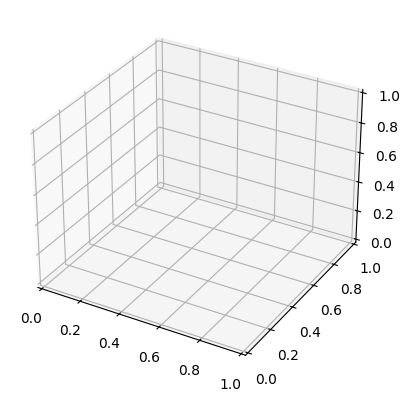

In [48]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.offline as py
from scipy.spatial import Delaunay
import plotly.graph_objs as go
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata

def calculate_mse(file_path):
    df = pd.read_excel(file_path)
    original_values = df['Z']
    predicted_values = df['Z_pred']
    mse = mean_squared_error(original_values, predicted_values)
    mse_message = f"O MSE_sup:{mse:.4f}"
    return mse_message

fig = plt.figure()
ax = plt.axes(projection='3d')
df = pd.read_excel(f"1000_model_8_8_19.xlsx")
x = df['X'].values
y = df['Y'].values
z = df['Z'].values

# 3. Criar uma grade para X e Y
x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

# 4. Interpolação dos dados para obter Z na grade
z_grid = griddata((x, y), z, (x_grid, y_grid), method='cubic')

# 5. Criar o plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 6. Plotar a superfície
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')

# 7. Adicionar rótulos e título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Superfície 3D Interpolada dos Dados')

# 8. Mostrar a barra de cores
fig.colorbar(surf)

# 9. Mostrar o plot
plt.show()



In [36]:
def PlotSurface():
    df = pd.read_excel(f"1000_model_8_8_19.xlsx")
    x = np.array(df['X'])
    y = np.array(df['Y'])
    z = np.array(df['Z'])
    z_pred = np.array(df['Z_pred'])
    points = np.column_stack((x, y))
    print(points)
    tri = Delaunay(points)

    fig_original = ff.create_trisurf(x=x, y=y, z=z.flatten(), 
                                    simplices=tri.simplices, colormap='Greys',
                                    title='Surface Fit - Original Values')

    fig_predicted = ff.create_trisurf(x=x, y=y, z=z_pred.flatten(), 
                                    simplices=tri.simplices, colormap='Viridis',
                                    title='Surface Fit - Predicted Values')

    data = [fig_original.data[0], fig_predicted.data[0], ]
    fig = go.Figure(data=data)
    fig.update_layout(title='Surface Fit', autosize=False,
            width=500, height=500,
            margin=dict(l=65, r=50, b=65, t=90))
    fig.show()

In [37]:
PlotSurface( ) 
mse_sup = calculate_mse(f"1000_model_8_8_19.xlsx" )
print(mse_sup)


[[-2.         -2.        ]
 [-1.87096774 -1.87096774]
 [-1.74193548 -1.74193548]
 ...
 [ 1.74193548  1.74193548]
 [ 1.87096774  1.87096774]
 [ 2.          2.        ]]


QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qz Q12 Qc Qt Qbb
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 143473197  delaunay  Qz-infinity-point  Q12-allow-wide  Qcoplanar-keep
  Qtriangulate  Qbbound-last  _pre-merge  _zero-centrum  Qinterior-keep  Pgood
  _max-width  4  Error-roundoff 2.8e-15  _one-merge 1.9e-14
  Visible-distance 5.5e-15  U-max-coplanar 5.5e-15  Width-outside 1.1e-14
  _wide-facet 3.3e-14  _maxoutside 2.2e-14

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1024(v4): -2.2e-16 -2.2e-16     2
- p15(v3): -0.065 -0.065     0
- p31(v2):     2     2   1.8
- p0(v1):    -2    -2   1.8

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2.8e-15.  The center point, facets and distances
to the center point are as follows:

center point -0.01613 -0.01613    1.409

facet p15 p31 p0 distance=    0
facet p1024 p31 p0 distance=    0
facet p1024 p15 p0 distance=    0
facet p1024 p15 p31 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:        -2         2  difference=    4
  1:        -2         2  difference=    4
  2:         0         2  difference=    2

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2.8e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


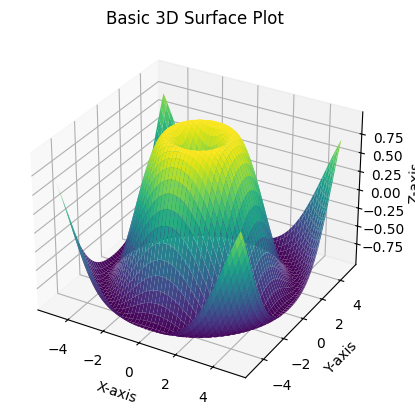

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Creating data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the basic 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Customizing the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Basic 3D Surface Plot')

# Displaying the plot
plt.show()